#### **Problem Statement:**
Predicting the quality of life index in a city based on different attributes using 3 different regression techniques.
> 1. Support Vector Machine
> 2. Neural Networks
> 3. Linear Regression

**Importing the required Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

**Loading the Dataset**

In [2]:
dataframe=pd.read_csv('quality_of_life.csv') 

In [3]:
dataframe.shape

(238, 10)

**Data Ananlysis**

In [4]:
dataframe.head()

,City,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,"Canberra, Australia",224.49,143.18,77.69,81.99,65.89,4.12,24.34,13.66,82.72
1,"The Hague (Den Haag), Netherlands",214.98,123.24,79.02,80.93,61.61,5.97,23.04,19.13,90.61
2,"Adelaide, Australia",214.53,127.53,69.45,80.76,68.52,3.48,24.33,19.00,94.96
3,"Raleigh, NC, United States",208.44,143.47,64.74,77.62,65.28,3.26,33.60,20.62,83.88
4,"Eindhoven, Netherlands",201.83,112.82,76.34,75.91,67.00,5.89,25.06,22.75,85.38


In [5]:
dataframe.columns

Index(['City', 'Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Health Care Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index'],
      dtype='object')

In [6]:
dataframe.dtypes

City                               object
Quality of Life Index             float64
Purchasing Power Index            float64
Safety Index                      float64
Health Care Index                 float64
Cost of Living Index              float64
Property Price to Income Ratio    float64
Traffic Commute Time Index        float64
Pollution Index                   float64
Climate Index                     float64
dtype: object

In [7]:
dataframe.describe(include='all')

,City,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
count,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
unique,238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,"Canberra, Australia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,142.639664,77.557773,56.045546,66.971092,54.377101,11.738193,36.158824,50.600798,77.383319
std,NaN,36.825194,37.858418,15.480261,9.336992,19.395914,8.416366,8.982003,20.690940,17.273781
min,NaN,48.520000,7.750000,16.600000,37.920000,19.520000,0.930000,16.340000,13.100000,14.280000
25%,NaN,115.880000,41.800000,45.475000,60.750000,36.885000,5.990000,29.737500,33.332500,67.305000
50%,NaN,146.020000,78.485000,56.515000,68.005000,55.300000,10.545000,35.275000,50.405000,81.695000
75%,NaN,171.135000,107.615000,69.122500,74.055000,68.835000,14.477500,41.362500,65.975000,89.767500


In [8]:
tc=dataframe.corr() #Finding correlation between all attributes
tc

,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
Quality of Life Index,1.000000,0.833575,0.350479,0.617249,0.645495,-0.637725,-0.594004,-0.877454,0.051663
Purchasing Power Index,0.833575,1.000000,0.065920,0.510199,0.735499,-0.600931,-0.319704,-0.631464,-0.111032
Safety Index,0.350479,0.065920,1.000000,0.260524,0.057307,0.116311,-0.355256,-0.277019,-0.196558
Health Care Index,0.617249,0.510199,0.260524,1.000000,0.450218,-0.182733,-0.223536,-0.516993,0.078693
Cost of Living Index,0.645495,0.735499,0.057307,0.450218,1.000000,-0.351811,-0.215271,-0.611388,0.014947
Property Price to Income Ratio,-0.637725,-0.600931,0.116311,-0.182733,-0.351811,1.000000,0.326239,0.430665,0.093310
Traffic Commute Time Index,-0.594004,-0.319704,-0.355256,-0.223536,-0.215271,0.326239,1.000000,0.518284,0.090439
Pollution Index,-0.877454,-0.631464,-0.277019,-0.516993,-0.611388,0.430665,0.518284,1.000000,-0.019841
Climate Index,0.051663,-0.111032,-0.196558,0.078693,0.014947,0.093310,0.090439,-0.019841,1.000000


**Data Visualization**

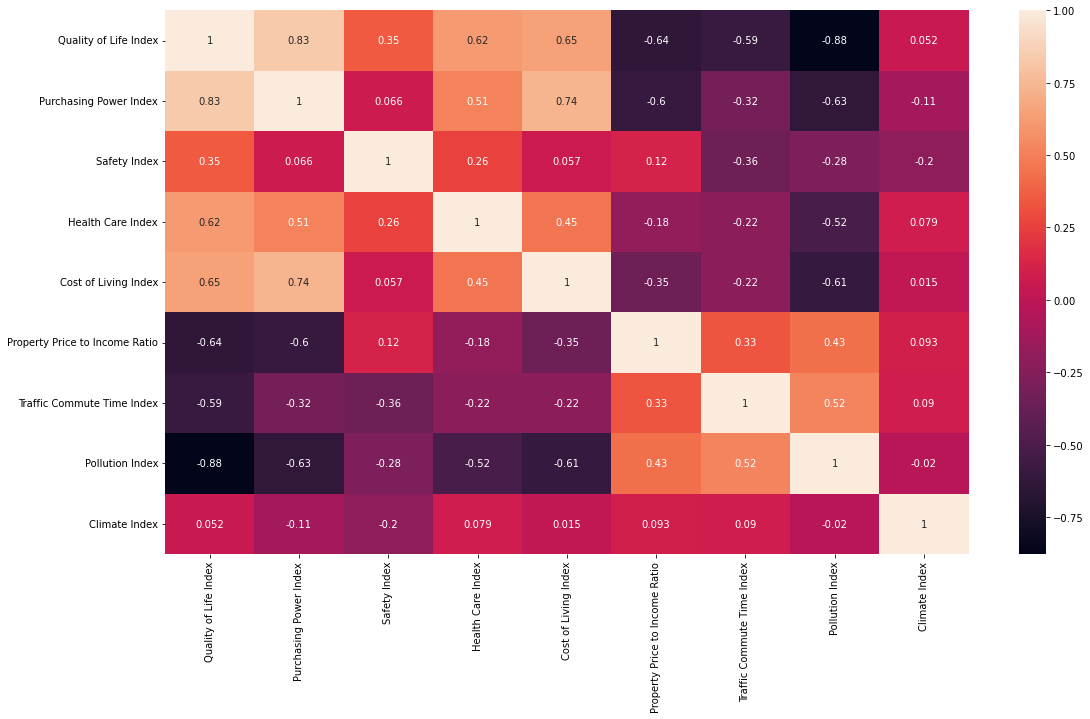

In [9]:
plt.figure(figsize=(18,10))
sns.heatmap(tc, annot=True)
plt.show()

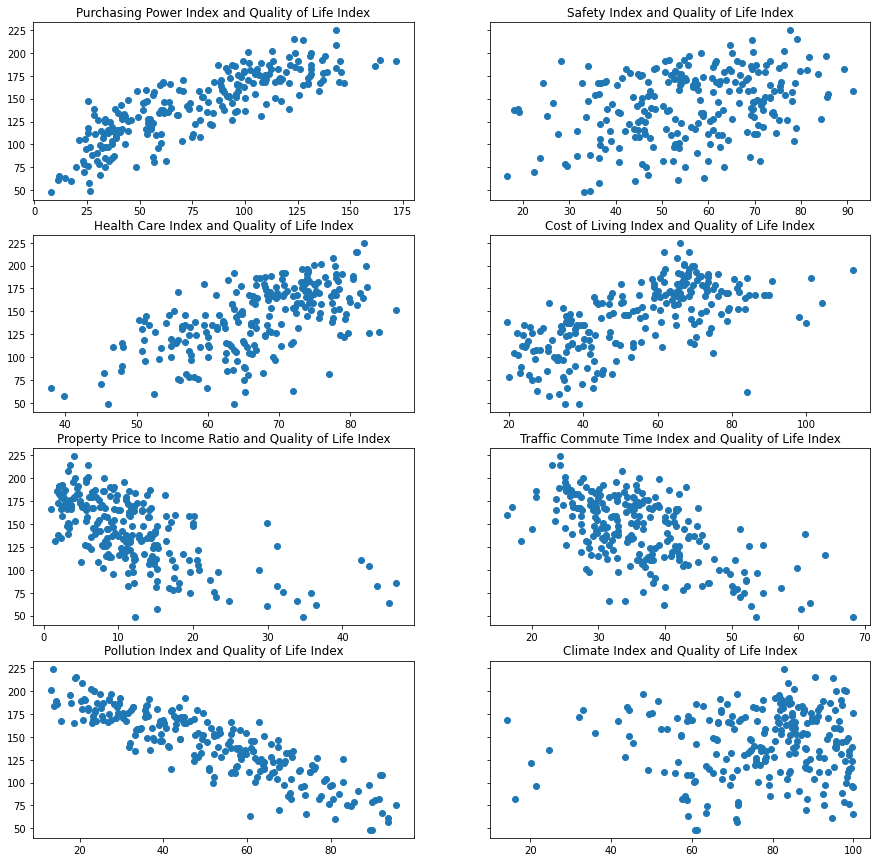

In [10]:
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharey=True, figsize =(15,15)) 
ax1.scatter(dataframe['Purchasing Power Index'],dataframe['Quality of Life Index'])
ax1.set_title('Purchasing Power Index and Quality of Life Index')

ax2.scatter(dataframe['Safety Index'],dataframe['Quality of Life Index'])
ax2.set_title('Safety Index and Quality of Life Index')

ax3.scatter(dataframe['Health Care Index'],dataframe['Quality of Life Index'])
ax3.set_title('Health Care Index and Quality of Life Index')

ax4.scatter(dataframe['Cost of Living Index'],dataframe['Quality of Life Index'])
ax4.set_title('Cost of Living Index and Quality of Life Index')

ax5.scatter(dataframe['Property Price to Income Ratio'],dataframe['Quality of Life Index'])
ax5.set_title('Property Price to Income Ratio and Quality of Life Index')

ax6.scatter(dataframe['Traffic Commute Time Index'],dataframe['Quality of Life Index'])
ax6.set_title('Traffic Commute Time Index and Quality of Life Index')

ax7.scatter(dataframe['Pollution Index'],dataframe['Quality of Life Index'])
ax7.set_title('Pollution Index and Quality of Life Index')

ax8.scatter(dataframe['Climate Index'],dataframe['Quality of Life Index'])
ax8.set_title('Climate Index and Quality of Life Index')

plt.show()

**Train and Test Data**

In [11]:
X = dataframe.drop(['Quality of Life Index','City'],axis=1)
y = dataframe['Quality of Life Index']

In [12]:
print(X)

     Purchasing Power Index  Safety Index  Health Care Index  \
0                    143.18         77.69              81.99   
1                    123.24         79.02              80.93   
2                    127.53         69.45              80.76   
3                    143.47         64.74              77.62   
4                    112.82         76.34              75.91   
..                      ...           ...                ...   
233                   11.43         53.53              65.15   
234                   17.54         44.16              52.50   
235                   25.86         36.51              39.84   
236                   26.32         34.41              63.71   
237                    7.75         33.09              45.94   

     Cost of Living Index  Property Price to Income Ratio  \
0                   65.89                            4.12   
1                   61.61                            5.97   
2                   68.52                       

In [13]:
print(y)

0      224.49
1      214.98
2      214.53
3      208.44
4      201.83
        ...  
233     61.69
234     60.10
235     57.42
236     48.67
237     48.52
Name: Quality of Life Index, Length: 238, dtype: float64


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

**Build Model**

> 1. Support Vector Machine

In [15]:
regr_svm = svm.SVR()

In [16]:
regr_svm.fit(X_train, y_train)

SVR()

> 2. Neural Network

In [17]:
regr_nn = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
regr_nn.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=500, random_state=1)

> 3. Linear Regression

In [19]:
regr_lr = LinearRegression()

In [20]:
regr_lr = regr_lr.fit(X_train, y_train)

**Calculating Accuracy**

> 1. Support Vector Machine

In [32]:
accuracy_svm = regr_svm.score(X_test,y_test)*100
print("Accuracy of SVM: ",accuracy_svm,"%")

Accuracy of SVM:  66.68920766672795 %


> 2. Neural Network

In [33]:
accuracy_nn = regr_nn.score(X_test,y_test)*100
print("Accuracy of Neural Network: ",accuracy_nn,"%")

Accuracy of Neural Network:  96.4419104234894 %


> 3. Linear Regression

In [35]:
accuracy_lr = regr_lr.score(X_test,y_test)*100
print("Accuracy of Linear Regression: ",accuracy_lr,"%")

Accuracy of Linear Regression:  99.99999827931072 %


**Predicting Outputs**

> 1. Support Vector Machine

In [39]:
svm_pred = regr_svm.predict(X_test)
print(svm_pred)

[123.83463149 155.94802201 152.19269564 164.62048634 128.98050212
 174.82906055 148.63301534 172.49476126 137.2103955  118.52265727
 118.12082631 139.01312066 128.92131924 172.45522654 118.23073298
 119.49496168 122.48035404 164.45850976 155.87339503 154.86360535
 132.80593529 161.13223814 170.65871386 153.6026574  116.69401902
 121.34076243 158.9606446  121.90249861 168.19210392 145.47392254
 116.1036644  121.70206468 121.27787687 160.96028581 123.17206914
 161.89396618 171.77540178 170.2937981  147.9454319  141.24906617
 171.49673689 158.91750934 169.58470897 171.65075344 151.14146839
 170.39479607 174.9080074  167.93235085]


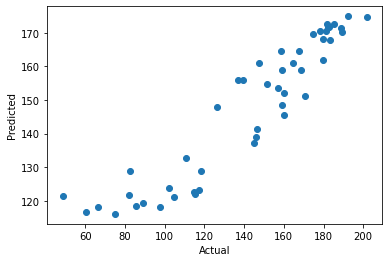

In [40]:
plt.scatter(y_test,svm_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

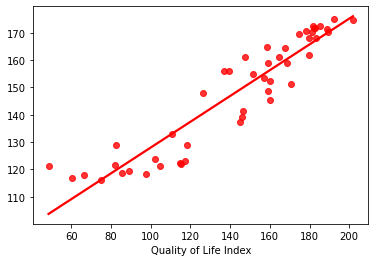

In [42]:
sns.regplot(x=y_test,y=svm_pred,ci=None,color ='red');

> 2. Neural Network

In [46]:
nn_pred = regr_nn.predict(X_test)
print(nn_pred)

[104.58581003 156.50169661 173.45460277 163.36401205  88.91310103
 204.4923922  167.98974994 190.58922705 140.24259588  68.60147841
  60.13722109 145.11567537 111.44853819 183.14201961  87.72642407
  90.43410338 118.54843441 165.57234029 147.94192319 166.2896895
 111.95575123 147.22205239 178.37306193 172.38104334  57.50646221
  48.71567797 160.56116736 125.21406142 187.40843625 153.66718958
  73.15907753  85.73039621 101.79625172 171.72525104 120.319018
 172.15520029 176.08293912 181.42043768 142.3189541  139.9319191
 183.65399591 163.57169626 172.31394868 184.59929265 181.38695551
 186.43716832 192.65325728 179.57857817]


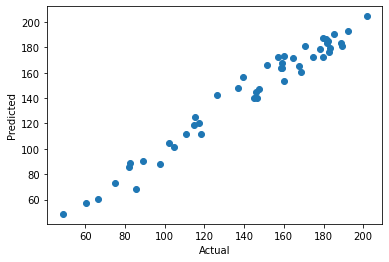

In [47]:
plt.scatter(y_test,nn_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

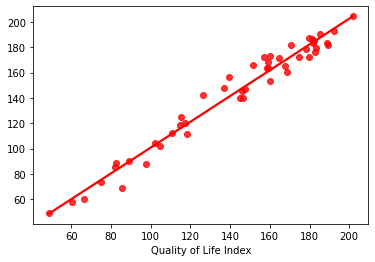

In [48]:
sns.regplot(x=y_test,y=nn_pred,ci=None,color ='red');

> 3. Linear Regression

In [49]:
lr_pred = regr_lr.predict(X_test)
print(nn_pred)

[104.58581003 156.50169661 173.45460277 163.36401205  88.91310103
 204.4923922  167.98974994 190.58922705 140.24259588  68.60147841
  60.13722109 145.11567537 111.44853819 183.14201961  87.72642407
  90.43410338 118.54843441 165.57234029 147.94192319 166.2896895
 111.95575123 147.22205239 178.37306193 172.38104334  57.50646221
  48.71567797 160.56116736 125.21406142 187.40843625 153.66718958
  73.15907753  85.73039621 101.79625172 171.72525104 120.319018
 172.15520029 176.08293912 181.42043768 142.3189541  139.9319191
 183.65399591 163.57169626 172.31394868 184.59929265 181.38695551
 186.43716832 192.65325728 179.57857817]


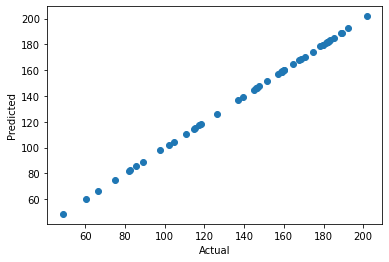

In [50]:
plt.scatter(y_test,lr_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

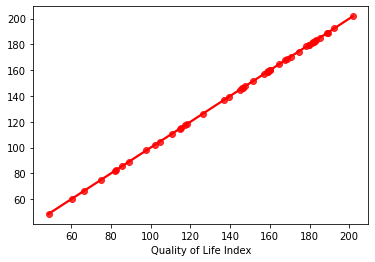

In [51]:
sns.regplot(x=y_test,y=lr_pred,ci=None,color ='red');